For theoretical background please refer to theoretical discussion reading material on LMS .

The case study we take up in this module pertains to red wines. Dataset that we have contains chemical properties over 4000 red wines . In class we'll take up two important chemical properties which control wine's aroma and potency , namely sulphate and alcohol content.

We want to check how many groups exist within wines based on these chemicals. Lets begin.

In [1]:
import warnings
warnings.filterwarnings('ignore')

myfile='/home/dell/GIT_REPO/DS_R_Language/Edvancer_Class/DataScienceWithR/Data/Data/winequality-red.csv'
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [2]:
#print(wine)

In [3]:
wine=wine[["sulphates","alcohol"]]

In [4]:
wine.head()

,sulphates,alcohol
0,0.56,9.4
1,0.68,9.8
2,0.65,9.8
3,0.58,9.8
4,0.56,9.4


You can see that scale of sulphates and alcohol are very different. If we let them be like that , distances will be dominated by alcohol percentages alone due to their scale. We need to scale them

In [5]:
wine_std=pd.DataFrame(scale(wine),columns=list(wine.columns))

Output of function `scale` is matrix , we need to convert it back to data frame in order to keep on using it as data frame.

In [6]:
wine_std.head()

,sulphates,alcohol
0,-0.579207,-0.960246
1,0.128950,-0.584777
2,-0.048089,-0.584777
3,-0.461180,-0.584777
4,-0.579207,-0.960246


In [7]:
wine_std.describe()

,sulphates,alcohol
count,1.599000e+03,1.599000e+03
mean,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00
min,-1.936507e+00,-1.898919e+00
25%,-6.382196e-01,-8.663789e-01
50%,-2.251281e-01,-2.093081e-01
75%,4.240158e-01,6.354971e-01
max,7.918677e+00,4.202453e+00


In [8]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

In the code below , we are trying different values of cluster numbers and for each we are examning silhoutte scores along with their silhoutte plots and visual representation of clusters.

Most of the code below has to do with how the plots are made pretty.

You dont need to do all that every time you do segmentation using K-means. This is more to do with giving you first hand experience as to what silhoutte plots are and how the eventual clusters look like.

You should also notice , how silhoutte scores both average and individual detriorate as we keep on unneccesarily increasing number of clusters. 

For n_clusters = 2 The average silhouette_score is : 0.42245883835747594


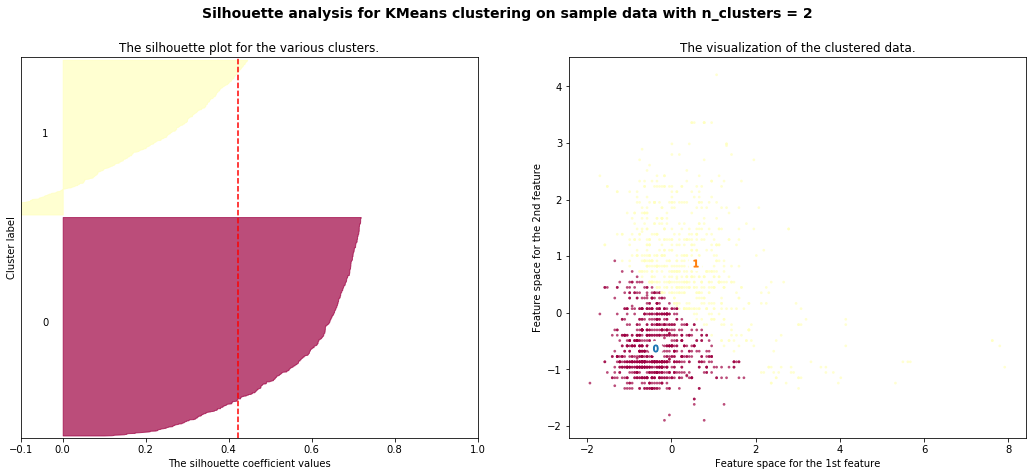

For n_clusters = 3 The average silhouette_score is : 0.46636871823618803


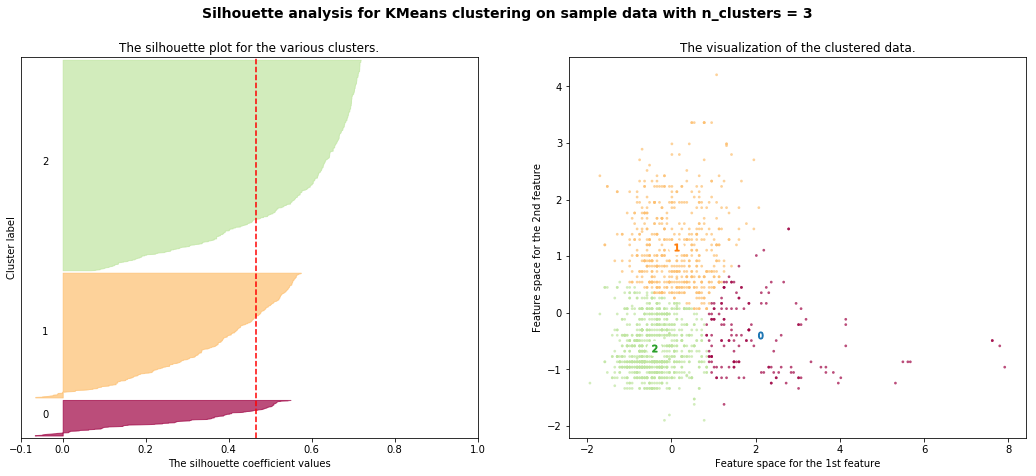

For n_clusters = 4 The average silhouette_score is : 0.4273298056974145


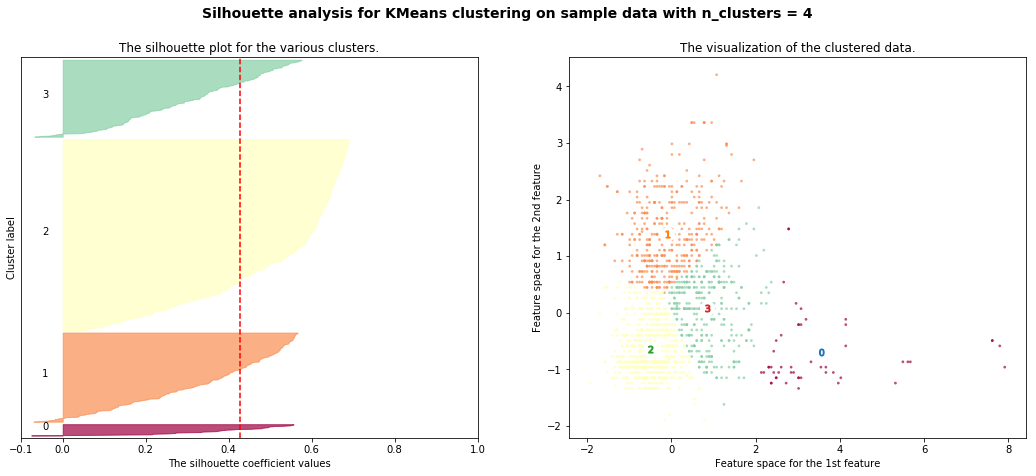

For n_clusters = 5 The average silhouette_score is : 0.39957751701597205


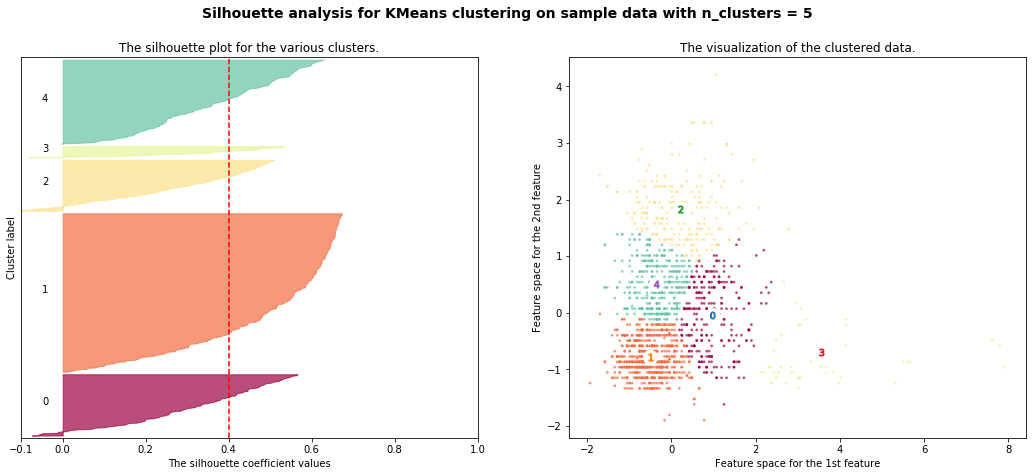

For n_clusters = 6 The average silhouette_score is : 0.39264390266465876


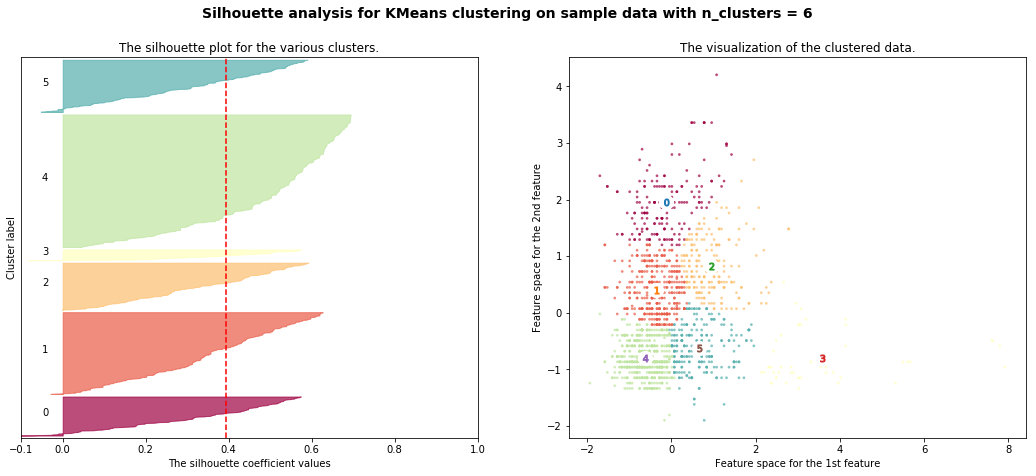

For n_clusters = 7 The average silhouette_score is : 0.37327813005122623


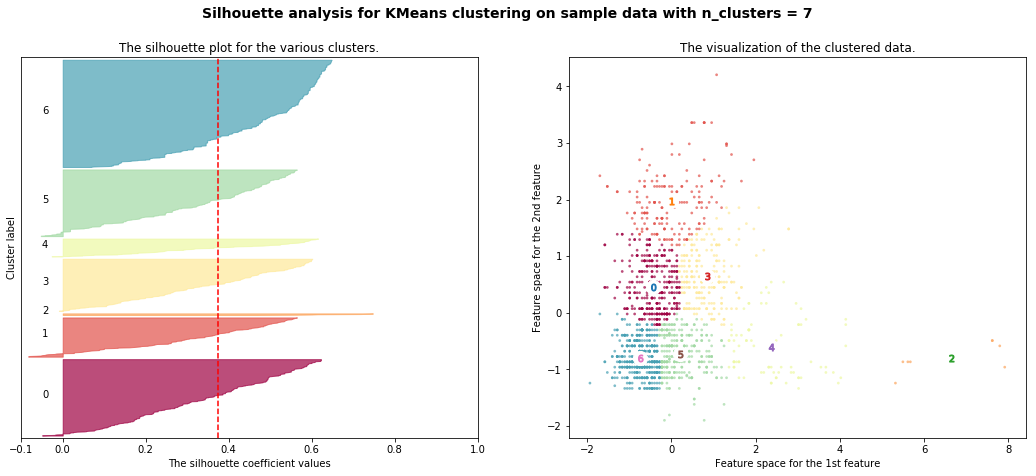

For n_clusters = 8 The average silhouette_score is : 0.37336123827471207


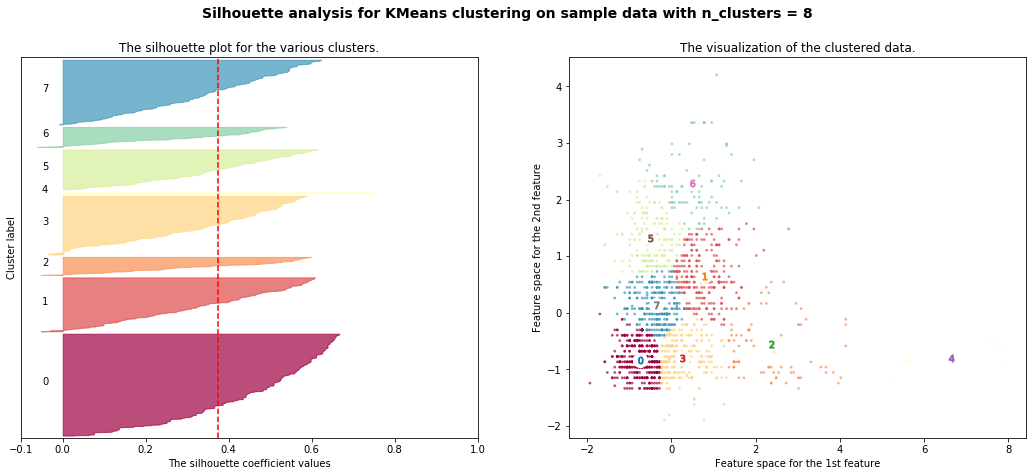

For n_clusters = 9 The average silhouette_score is : 0.3514757602554495


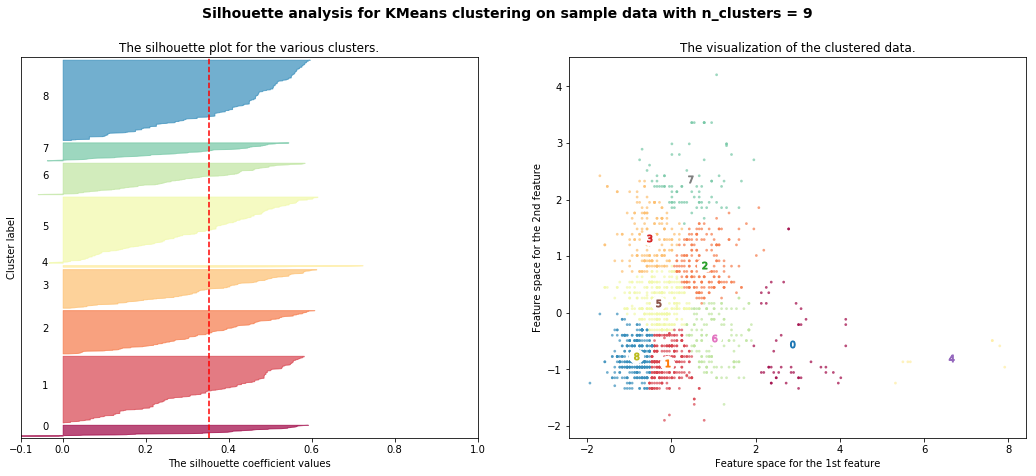

In [9]:
X=wine_std.as_matrix()
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        #color = cm.spectral(float(i) / n_clusters)
        color = cmap(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap= cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

From silhoutte's score above we decided value of n_clusters as 3

In [10]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
wine_std.head(20)

,sulphates,alcohol,cluster
0,-0.579207,-0.960246,1
1,0.128950,-0.584777,1
2,-0.048089,-0.584777,1
3,-0.461180,-0.584777,1
4,-0.579207,-0.960246,1
5,-0.579207,-0.960246,1
6,-1.169337,-0.960246,1
7,-1.110324,-0.397043,1
8,-0.520193,-0.866379,1
9,0.837107,0.072294,0


In [11]:
labels = kmeans.labels_
wine_std["cluster"]=labels

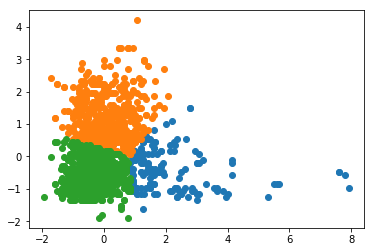

In [12]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = wine_std[wine_std["cluster"]==i].as_matrix()
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')

plt.show()

We can decide number of cluster using SSW as well as mentioned in the theoretical discussion. SSW is named `inertia_` as kmeans function's attribute.

In [35]:
kmeans.inertia_

285.1426706623408

Lets look at inertia/SSW values for many Ks , see if our conclusions match with results obtained from silhoutte score.

In [36]:
Ks=np.linspace(2,15,14)

In [37]:
Ks

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15.])

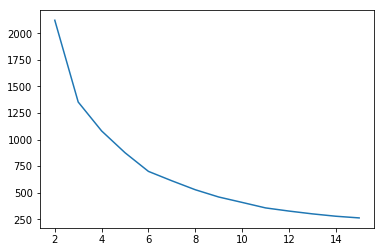

In [38]:
ssw=[]
for k in Ks:
    kmeans=KMeans(n_clusters=int(k))
    kmeans.fit(wine_std)
    ssw.append(kmeans.inertia_)
plt.plot(Ks,ssw)

You can see here the clear elbow point at k=3.

We can try hierarchical clustering as well, it gives most efficient clusters but at much more computational cost. Lets see if results from it are very different from K-means.

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)


For n_clusters = 2 The average silhouette_score is: 0.40261768566596773
For n_clusters = 3 The average silhouette_score is: 0.4380049865880846
For n_clusters = 4 The average silhouette_score is: 0.4076820598800345
For n_clusters = 5 The average silhouette_score is: 0.30453524323376086
For n_clusters = 6 The average silhouette_score is: 0.3119166847876583
For n_clusters = 7 The average silhouette_score is: 0.3053300032645912
For n_clusters = 8 The average silhouette_score is: 0.30500432227447505
For n_clusters = 9 The average silhouette_score is: 0.30379525227117193


We have agreement on number of clusters. Lets see how the end results differ

In [41]:
s = 3
hclust = AgglomerativeClustering(n_clusters=s, affinity='euclidean',linkage='ward')
hclust.fit(wine_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [42]:
labels = hclust.fit_predict(X)
wine_std["cluster"]=labels

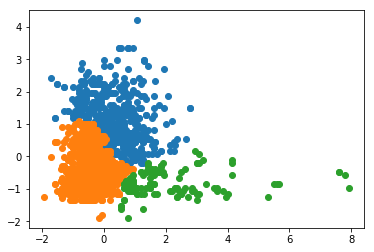

In [43]:
for i in range(s):
    # select only data observations with cluster label == i
    hc = wine_std[wine_std["cluster"]==i].as_matrix()
    # plot the data observations
    plt.plot(hc[:,0],hc[:,1],'o')

plt.show()

We can see that kmeans did an excellent job and we did not really need to get into hierarchical clustering to get the best results.

Next we look density based clustering algorithm dbscan. We will take a toy data to bring out clear difference between k-means and dbscan. This example demonstrate how k-means can no capture non-spherical groups in the data. We will be using make_moons function to make data which has two moon shaped very apparent groups. Lets see.

In [44]:
from sklearn.datasets import make_moons

mydata = make_moons(n_samples = 2000,noise=0.05)
print(mydata[0].shape)
mydata=pd.DataFrame(mydata[0],columns=["X","Y"])
mydata.head()

(2000, 2)


,X,Y
0,-0.869115,0.592554
1,0.724858,-0.451131
2,0.677663,-0.410107
3,1.825244,0.023022
4,0.586517,-0.431660


In [45]:
from ggplot import *

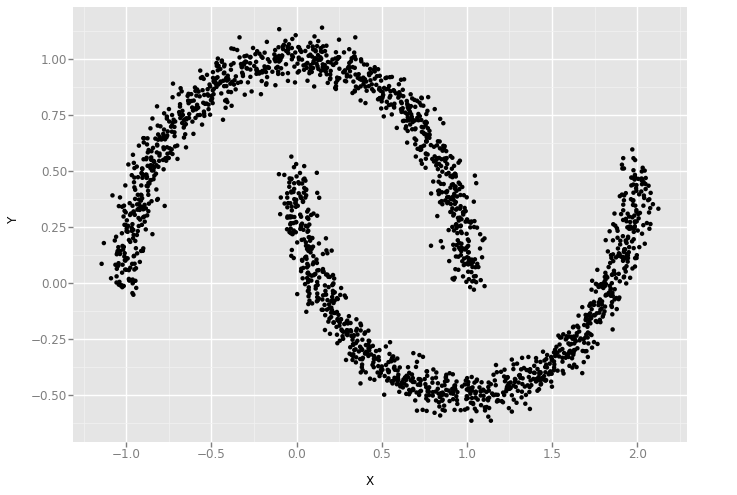

<ggplot: (8749489958621)>

In [46]:
ggplot(mydata,aes(x='X',y='Y'))+geom_point()

We can ask k-means to make as many clusters and it will oblige as opposed to dbscan which finds on its own how many natural clusters are there in the data

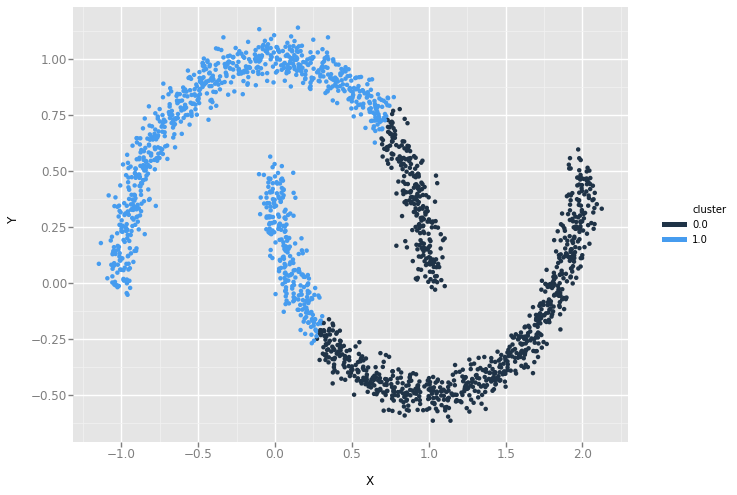

<ggplot: (8749496554485)>

In [47]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_
ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

As you can see , these are not the clusters that you expected . Lets ask k-mean to make 5 clusters and see what it does

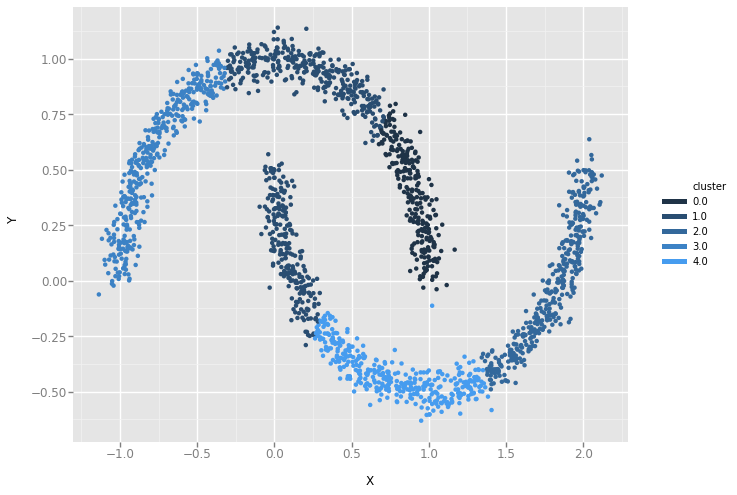

<ggplot: (8749496537285)>

In [26]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_
ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

You can force k-means to make as many groups in the data as you want, it wont bother about how many natural groups there are in the data. lets see how dbscan treats this.

In [27]:
from sklearn.cluster import DBSCAN
from sklearn import metrics


In [28]:
del mydata['cluster']

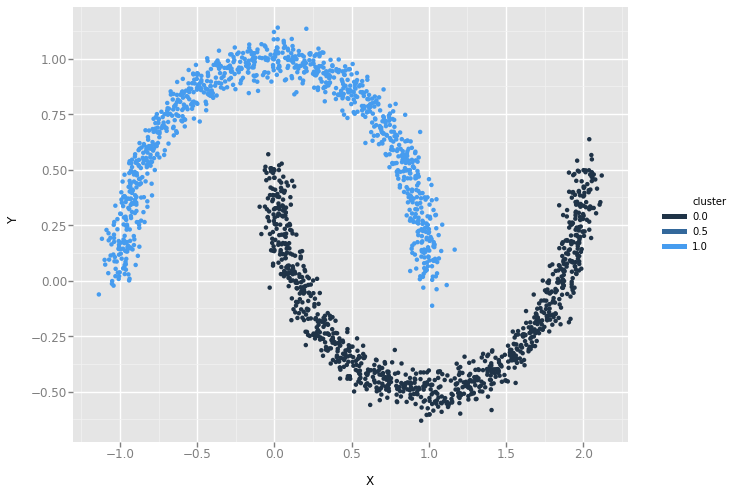

<ggplot: (8749494334869)>

In [29]:
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_
ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

Lets try increasing eps and see what effects it has . 

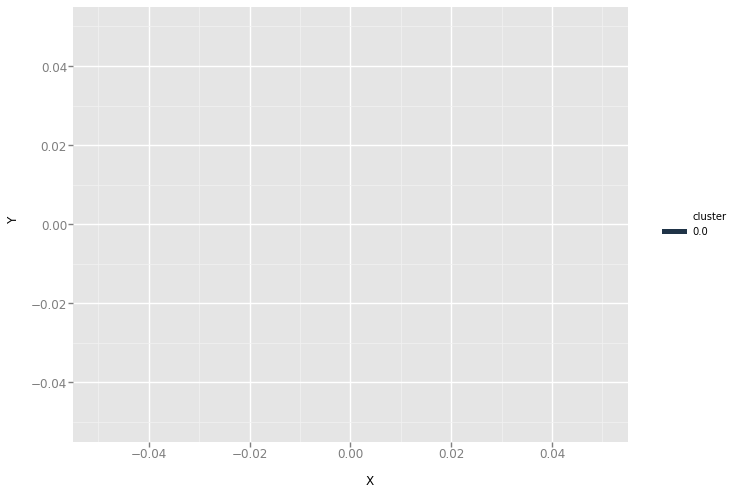

<ggplot: (8749494318389)>

In [30]:
del mydata['cluster']
db = DBSCAN(eps=0.3, min_samples=10, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_
ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

As you can see increasing neighborhood size results in all points becoming part of same cluster, which is the intended effect.

Now lets see an example where , dbscan doesnt blindly club all the points into clusters, but leave points which are not supposed to be in any clusters. This also demonstrate how k-means is different from dbscan.

In [31]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Silhouette Coefficient: 0.429


In [32]:
df=pd.DataFrame(X,columns=['x1','x2'])
df['labels']=labels

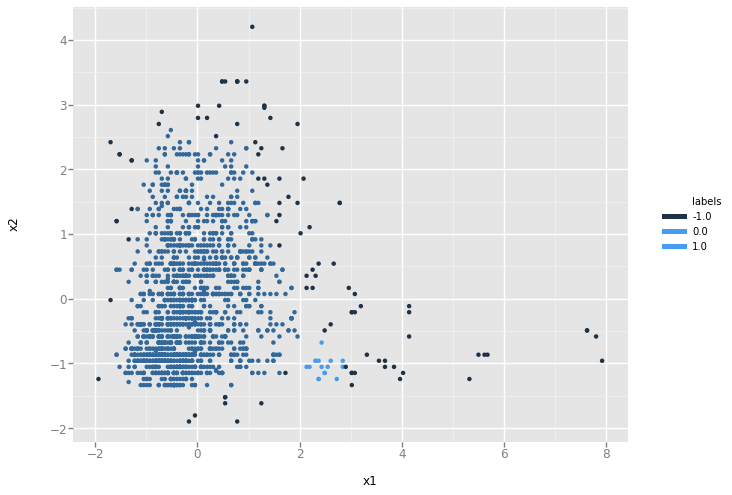

<ggplot: (8749490021349)>

In [33]:
ggplot(df,aes(x='x1',y='x2',color='labels'))+geom_point()

You can see how dbscan has found outliers. You can play around with the values of eps and min_samples to see how that changes outlier detection and number of clusters detected by dbscan.
